# Syria Tel Customers

**Author:** Bridget Coleman
***

## Overview

Syria Tel is a communications company.  A company can expect a certain amount of turnover in custumers.  I examined the percentage of turnover and looked at reasons for why a customer may leave.



## Business Problem

It can be more expensive to get new clients versus retaining current clients.  The question is what makes a customer leave.  Can we predict when a customer is considering changing phone services?  What incentive can we give to make them reconsider?  

## Data Understanding

The data has been collected from Kaggle.  The dataset has the information from 3,333 customers.  The dataset has information on the length of account, types of plans, minutes charged, and if they terminated the service.  

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as smf
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import linear_rainbow, het_breuschpagan

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import LabelEncoder

import statsmodels as sm
import sklearn.preprocessing as preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy import stats

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

from xgboost import XGBClassifier

np.random.seed(0)
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
telecom = pd.read_csv('telecom.csv')
telecom.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
telecom.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [4]:
telecom.shape

(3333, 21)

In [5]:
telecom['churn'].unique()

array([False,  True])

In [6]:
#Number of true and false values in churn

telecom['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

Out of the 3333 customers 14.49% decided to leave Syria.  How can we reduce this turn over rate?  Why did these customers decide to leave?  What can we do to make them stay?  What is the potential cost to get them to stay versus trying to get new customers? 

In [7]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [8]:
#Reformat column names

telecom.columns = [x.lower().replace(' ', '_') for x in telecom.columns]
telecom.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [9]:
#Checking the number of unique area codes

telecom["area_code"].value_counts()


415    1655
510     840
408     838
Name: area_code, dtype: int64

In [10]:
#Do I need this?  Broken down by area codes.

print(telecom.groupby(['area_code'])['churn'].mean())

area_code
408    0.145585
415    0.142598
510    0.148810
Name: churn, dtype: float64


Only three area codes are present in this data set.  We can check if one area code has a higher churn rate than the others.

In [11]:
# Phone number won't matter.  I am removing it.

telecom.drop(columns = 'phone_number', axis=1, inplace = True)
telecom.drop(columns = 'area_code', axis=1, inplace = True)
telecom.head()

,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [12]:
#How many unique values for customer service calls

telecom['customer_service_calls'].value_counts()

1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: customer_service_calls, dtype: int64

In [13]:
print(telecom.groupby(['customer_service_calls'])['churn'].mean())

customer_service_calls
0    0.131994
1    0.103302
2    0.114625
3    0.102564
4    0.457831
5    0.606061
6    0.636364
7    0.555556
8    0.500000
9    1.000000
Name: churn, dtype: float64


In [14]:
# Change international and voicemail columns to integers

telecom.international_plan.replace(('yes', 'no'), (1,0), inplace = True)
telecom.voice_mail_plan.replace(('yes', 'no'), (1,0), inplace = True)
telecom.head()

,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [15]:
data = pd.get_dummies(telecom)
data.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,...,0,0,0,0,0,0,0,0,0,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,...,0,0,0,0,0,0,0,0,0,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,...,0,0,0,0,0,0,0,0,0,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,...,0,0,0,0,0,0,0,0,0,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,...,0,0,0,0,0,0,0,0,0,0


In [16]:
target = data['churn']
data = data.drop(columns='churn', axis=1)

In [17]:
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size = .25, random_state=42)

In [18]:
data.corr()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
account_length,1.000000,0.024735,0.002918,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,...,0.014912,-0.026651,-0.013148,-0.000397,0.018810,0.012627,0.003555,-0.008476,-0.025631,0.018058
international_plan,0.024735,1.000000,0.006006,0.008745,0.049396,0.003755,0.049398,0.019100,0.006114,0.019106,...,-0.006214,0.007003,-0.006819,-0.006819,0.010383,-0.007445,-0.017442,0.002959,-0.018913,0.017134
voice_mail_plan,0.002918,0.006006,1.000000,0.956927,-0.001684,-0.011086,-0.001686,0.021545,-0.006444,0.021559,...,0.022208,-0.003545,-0.018072,0.000382,-0.014735,-0.019218,-0.039753,0.006313,-0.001233,-0.014735
number_vmail_messages,-0.004628,0.008745,0.956927,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,...,0.023093,-0.009857,-0.017963,0.004353,-0.011911,-0.016959,-0.036747,0.002070,0.008308,-0.017748
total_day_minutes,0.006216,0.049396,-0.001684,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,...,0.024650,-0.009345,0.004752,0.010353,-0.007147,0.006200,-0.002695,-0.001832,-0.019383,0.001115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
state_VT,0.012627,-0.007445,-0.019218,-0.016959,0.006200,-0.000797,0.006207,0.012950,-0.018353,0.012966,...,-0.020261,-0.019022,-0.022235,-0.022235,-0.023012,1.000000,-0.021269,-0.023165,-0.027121,-0.023012
state_WA,0.003555,-0.017442,-0.039753,-0.036747,-0.002695,0.005393,-0.002697,0.007933,-0.031195,0.007938,...,-0.019244,-0.018068,-0.021120,-0.021120,-0.021858,-0.021269,1.000000,-0.022002,-0.025760,-0.021858
state_WI,-0.008476,0.002959,0.006313,0.002070,-0.001832,-0.028977,-0.001839,-0.010750,-0.004475,-0.010741,...,-0.020959,-0.019678,-0.023002,-0.023002,-0.023805,-0.023165,-0.022002,1.000000,-0.028056,-0.023805
state_WV,-0.025631,-0.018913,-0.001233,0.008308,-0.019383,0.030234,-0.019380,-0.044919,-0.018722,-0.044945,...,-0.024539,-0.023039,-0.026930,-0.026930,-0.027871,-0.027121,-0.025760,-0.028056,1.000000,-0.027871


In [19]:
# Instantiate and fit a DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
tree_clf.fit(data_train, target_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [20]:
# Feature importance
tree_clf.feature_importances_

array([0.        , 0.11276794, 0.        , 0.05948675, 0.27433128,
       0.00446993, 0.04347044, 0.07281377, 0.        , 0.05428743,
       0.01575457, 0.00318456, 0.        , 0.08478762, 0.12066076,
       0.        , 0.15398495, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

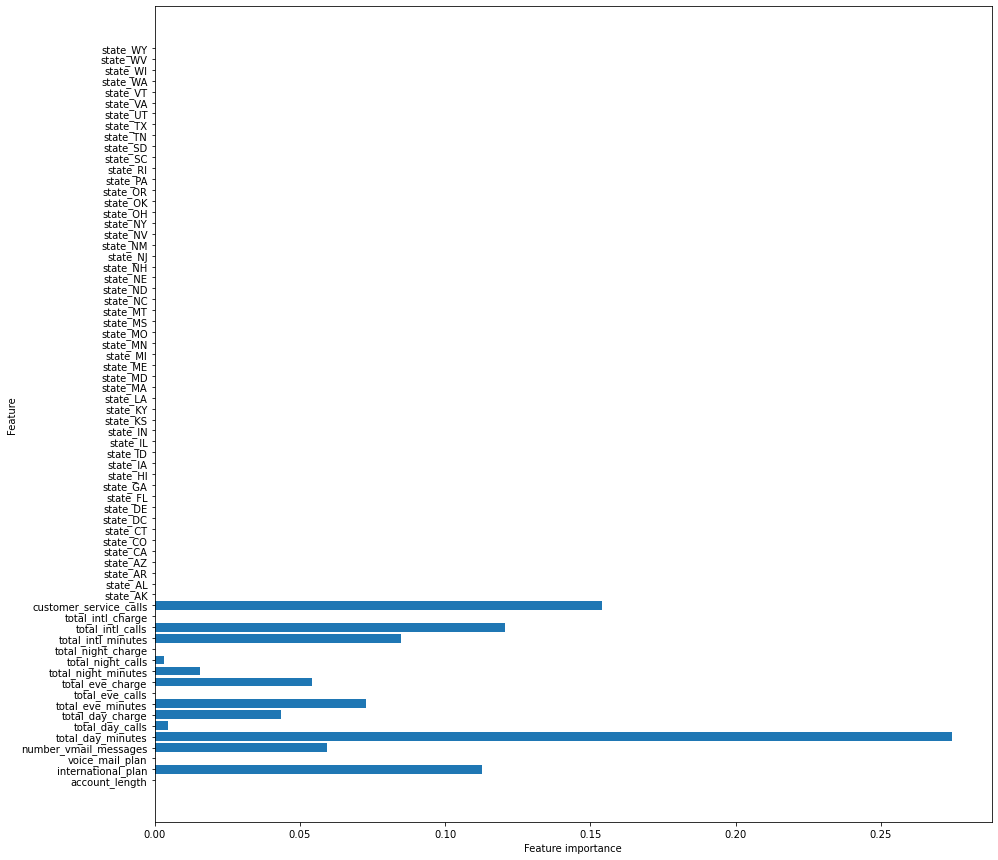

In [21]:
def plot_feature_importances(model):
    n_features = data_train.shape[1]
    plt.figure(figsize=(15,15))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), data_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(tree_clf)

In [22]:
# Test set predictions
pred = tree_clf.predict(data_test)

# Confusion matrix and classification report
print(confusion_matrix(target_test, pred))
print(classification_report(target_test, pred))

[[699  10]
 [ 44  81]]
              precision    recall  f1-score   support

       False       0.94      0.99      0.96       709
        True       0.89      0.65      0.75       125

    accuracy                           0.94       834
   macro avg       0.92      0.82      0.86       834
weighted avg       0.93      0.94      0.93       834



In [23]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(target_test, pred) * 100))

Testing Accuracy for Decision Tree Classifier: 93.53%


In [24]:
# Instantiate a BaggingClassifier
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), 
                                 n_estimators=20)

In [25]:
# Fit to the training data
bagged_tree.fit(data_train, target_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                  n_estimators=20)

In [26]:
bagged_tree.score(data_train, target_train)

0.9623849539815926

In [27]:
# Test accuracy score
bagged_tree.score(data_test, target_test)

0.9400479616306955

Based on the target and test results, this model is an overfit.

In [28]:
# Instantiate and fit a RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(data_train, target_train)

RandomForestClassifier(max_depth=5)

In [29]:
# Training accuracy score
forest.score(data_train, target_train)

0.8795518207282913

In [30]:
# Test accuracy score
forest.score(data_test, target_test)

0.8597122302158273

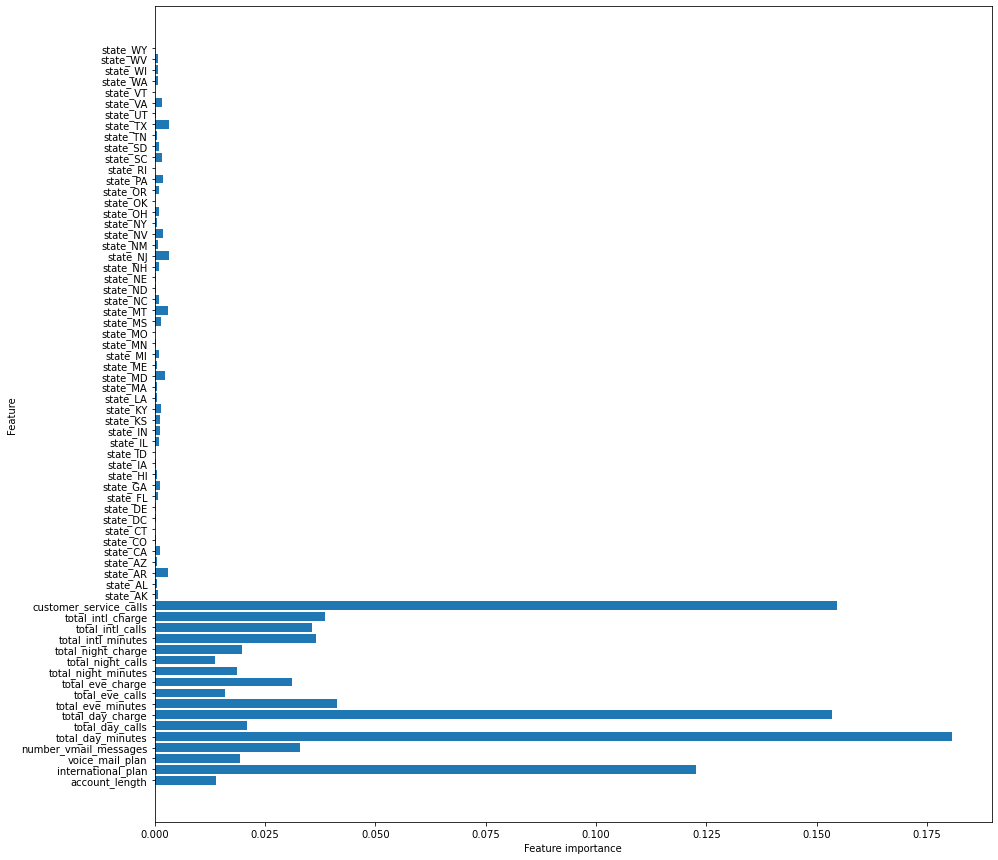

In [31]:
plot_feature_importances(forest)

Based on this customer service calls, day charges, day minutes, and an international plan have an impact on whether a customer leaves.  

In [32]:
target_train.value_counts()

False    2141
True      358
Name: churn, dtype: int64

In [33]:
# Instantiate XGBClassifier
clf_xg = XGBClassifier()


In [35]:
# Instantiate XGBClassifier
clf = XGBClassifier()

# Fit XGBClassifier
clf.fit(data_train, target_train)

# Predict on training and test sets
training_preds = clf.predict(data_train)
test_preds = clf.predict(data_test)

# Accuracy of training and test sets
training_accuracy = accuracy_score(target_train, training_preds)
test_accuracy = accuracy_score(target_test, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

[21:12:19] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Accuracy: 100.0%
Validation accuracy: 95.32%


Based on the results of this model, there seems to be an overfit.  

In [36]:
param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [6],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7],
    'n_estimators': [100],
}

In [38]:
grid_clf = GridSearchCV(clf, param_grid, scoring='accuracy', cv=None, n_jobs=1)
grid_clf.fit(data_train, target_train)

best_parameters = grid_clf.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = grid_clf.predict(data_train)
test_preds = grid_clf.predict(data_test)
training_accuracy = accuracy_score(target_train, training_preds)
test_accuracy = accuracy_score(target_test, test_preds)

print('')
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

[21:17:21] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:17:21] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:17:21] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:17:22] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be